<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/Modelos_de_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN


In [ ]:
# Dataset 1: 3 blobs
data, labels = make_blobs(n_samples=300, centers=3, cluster_std=0.70, random_state=0)




<ipython-input-4-21a1dca10f54>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')


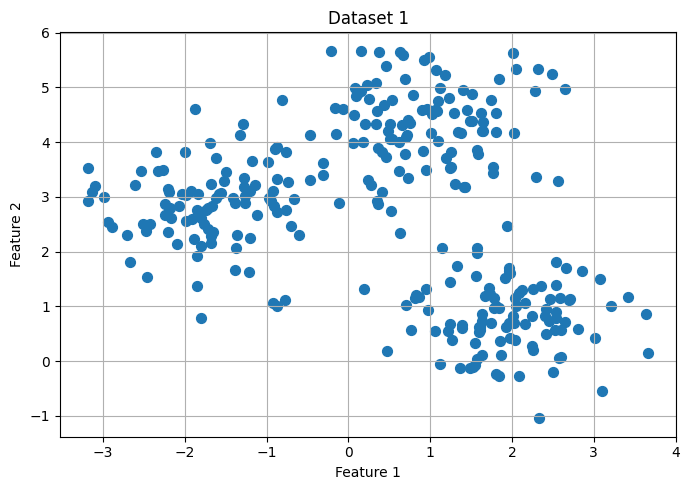

In [ ]:
import matplotlib.pyplot as plt

# Datos a visualizar

plt.figure(figsize=(7, 5))  # Cambiamos el tamaño de la figura

# Dibujar el scatter plot para data1
plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
plt.title('Dataset 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()



## K-Means

La inercia, en el contexto de K-Means, se refiere a la suma de las distancias al cuadrado de las muestras a su centro de cluster más cercano.

En el algoritmo K-Means, el objetivo principal es minimizar la inercia. Al hacerlo, el algoritmo intenta hacer que los puntos dentro de un cluster estén lo más cerca posible del centroide de ese cluster, lo que lleva a clusters más densos y cohesivos.

*   **Baja inercia:** Si la inercia es baja, significa que, en general, los puntos dentro de cada cluster están cerca de su centroide. Esto es indicativo de clusters bien definidos y densos, donde los puntos en cada cluster están estrechamente agrupados.

*   **Alta inercia:** Una inercia alta sugiere que muchos puntos están lejos de su centroide. Esto puede ser indicativo de varios escenarios, como clusters muy dispersos, una elección incorrecta del número de clusters, o incluso la presencia de subclusters dentro de un cluster más grande.

A medida que aumentas el número de clusters (k), la inercia tiende a disminuir. Esto es intuitivo porque, si tienes más centros (centroides), es más probable que los puntos estén más cerca de un centro. Sin embargo, esto no significa que debas elegir un k muy grande solo para minimizar la inercia. Aumentar k puede llevar a un sobreajuste, donde incluso el ruido en los datos se interpreta como clusters. Por eso, es común usar el "método del codo" para elegir un k óptimo observando cómo cambia la inercia a medida que k aumenta y buscando un punto donde el descenso de la inercia se vuelva menos pronunciado.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

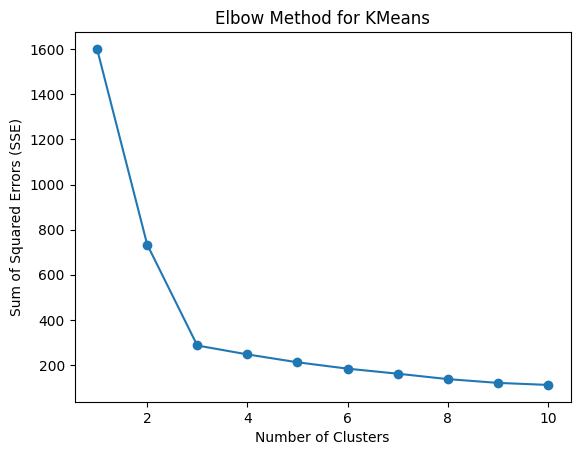

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Sum of squared errors
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()

# Ejemplo:
find_optimal_clusters_kmeans(data, 10)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


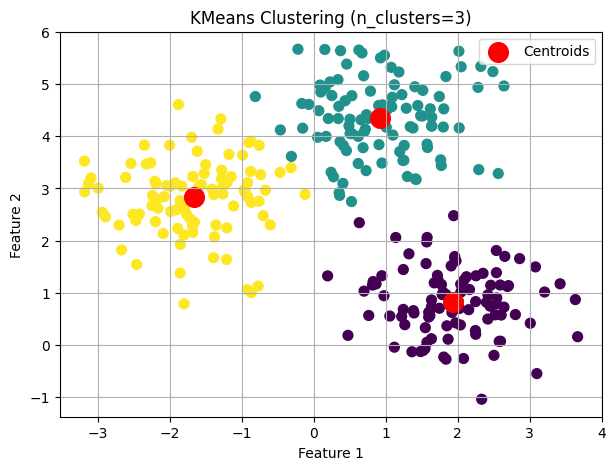

In [ ]:
# Aplicar KMeans con n_clusters=3
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)

# Graficar los resultados
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Estimate_bandwidth es utilizada principalmente para estimar el ancho de banda (o bandwidth) para el algoritmo Mean Shift, que es un algoritmo de clustering.


X: Es la entrada de datos para la cual quieres estimar el ancho de banda. Típicamente es una matriz donde cada fila es una observación y cada columna es una característica de esa observación.

quantile: Este es un valor entre 0 y 1. La función estimate_bandwidth utiliza una técnica basada en la distancia entre puntos para estimar el ancho de banda. El quantile especificado determina qué tan lejos están los puntos que se consideran para esta estimación. Por ejemplo, un quantile de 0.1 significa que se considera la distancia entre los puntos que están más cercanos al 10% de todos los pares de puntos posibles.

n_samples: Si tu conjunto de datos es muy grande, calcular el ancho de banda puede ser computacionalmente costoso. Para aliviar esto, puedes especificar n_samples, que es el número de muestras que se usarán para hacer una estimación rápida del ancho de banda. Estas muestras se seleccionan al azar.

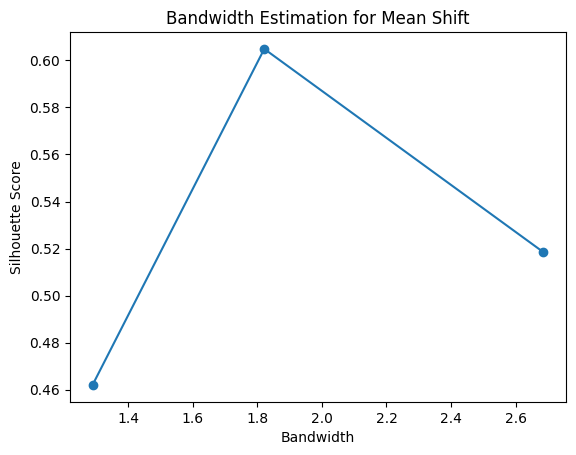

In [ ]:
from sklearn.cluster import estimate_bandwidth

def estimate_bandwidth_meanshift(data, quantile_range=(0.2, 0.5), step=0.1):
    bandwidths = []
    silhouettes = []

    quantiles = np.arange(quantile_range[0], quantile_range[1], step)

    for quantile in quantiles:
        bandwidth = estimate_bandwidth(data, quantile=quantile)
        bandwidths.append(bandwidth)

        ms = MeanShift(bandwidth=bandwidth).fit(data)
        if len(np.unique(ms.labels_)) > 1:
            sil_score = silhouette_score(data, ms.labels_)
            silhouettes.append(sil_score)
        else:
            silhouettes.append(-1)

    plt.plot(bandwidths, silhouettes, 'o-')
    plt.xlabel("Bandwidth")
    plt.ylabel("Silhouette Score")
    plt.title("Bandwidth Estimation for Mean Shift")
    plt.show()

# Ejemplo:
estimate_bandwidth_meanshift(data)


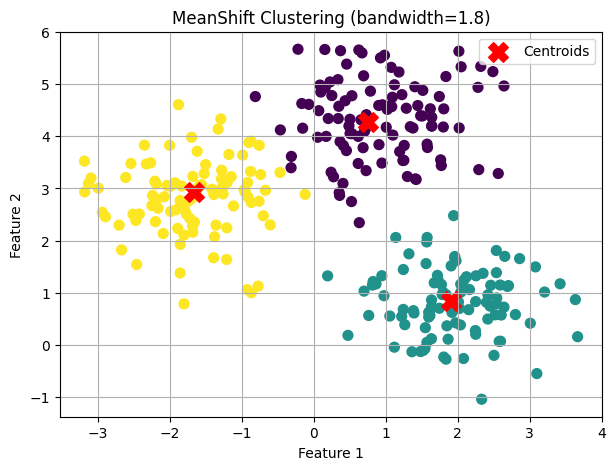

In [ ]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Aplicar MeanShift con bandwidth=1.6
bandwidth = 1.8
ms = MeanShift(bandwidth=bandwidth).fit(data)
labels = ms.labels_

# Graficar los resultados
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title(f'MeanShift Clustering (bandwidth={bandwidth})')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



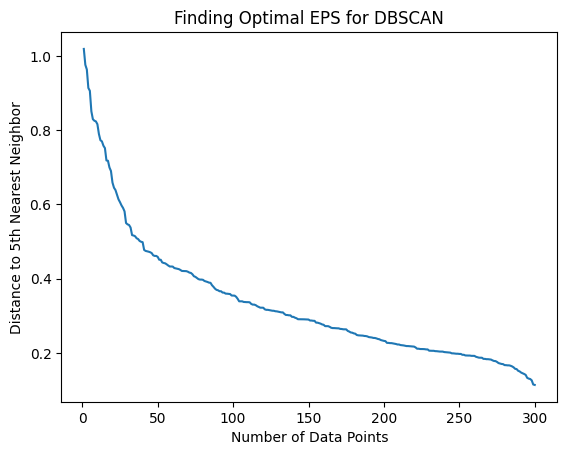

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_optimal_eps_dbscan(data, min_samples=5):
    nn = NearestNeighbors(n_neighbors=min_samples)
    nbrs = nn.fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Ordena las distancias y plotea
    distanceDec = sorted(distances[:, min_samples-1], reverse=True)
    plt.plot(list(range(1, len(distanceDec) + 1)), distanceDec)
    plt.xlabel("Number of Data Points")
    plt.ylabel("Distance to " + str(min_samples) + "th Nearest Neighbor")
    plt.title("Finding Optimal EPS for DBSCAN")
    plt.show()

# Ejemplo:
find_optimal_eps_dbscan(data)


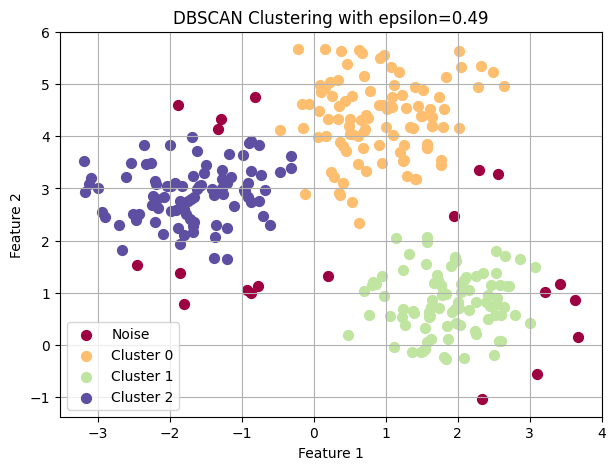

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Ajusta DBSCAN
db = DBSCAN(eps=0.49, min_samples=5).fit(data)

# Etiquetas de cluster
labels = db.labels_

# Grafica los resultados
plt.figure(figsize=(7, 5))
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=color, label='Cluster {}'.format(label) if label != -1 else 'Noise')

plt.title('DBSCAN Clustering with epsilon=0.49')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()
